In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import Image
from qutip import *
import pickle
import time

import sympy
import numpy as np
from sympy import Sum, summation
from sympy.physics.wigner import wigner_3j
import math
import sys

In [7]:
with open("8L_Doppler_nss_dx.txt","rb") as fp:
    nss_sw_list = pickle.load(fp)

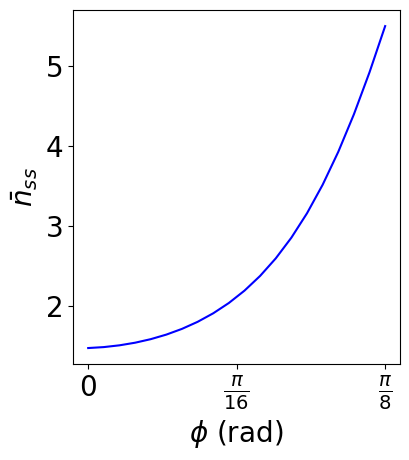

In [8]:
plt.rcParams.update({'font.size':20})
fig, ax = plt.subplots( figsize=(4.5, 5), sharex = True, sharey = True)
ax.plot(phis/np.pi, nss_sw_list, "-", color = "blue", label="RW n = 50")
ax.set_xticks([0, 0.0625, 0.125]) 
ax.set_xticklabels(["0", r"$\frac{\pi}{16}$", r"$\frac{\pi}{8}$"])
ax.set_ylabel(r"$\bar{n}_{ss}$")
ax.set_xlabel("$\phi$ (rad)")

fig.tight_layout()

In [9]:
with open("EIT_comp_dx.txt","rb") as fp:
    EIT_comp = pickle.load(fp)
with open("EIT_ncomp_dx.txt","rb") as fp:
    EIT_ncomp = pickle.load(fp)

In [10]:
w_s, w_r = [], []
sr = EIT_comp.get("sr")
n_sr = EIT_ncomp.get("sr")
nss_s, nss_r = [], []

for i in range(20):
    w_s.append(sr[i][4])
    nss_s.append(n_sr[i][1])

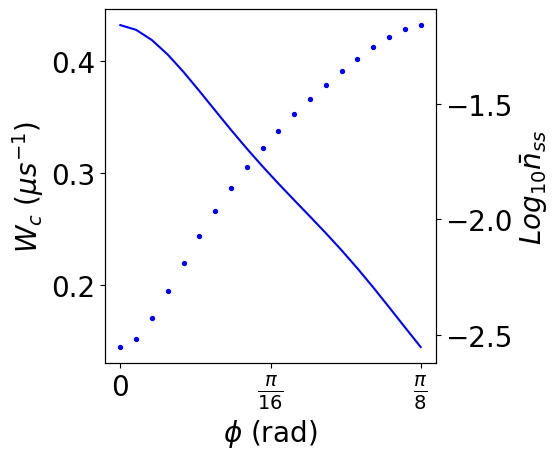

In [11]:
plt.rcParams.update({'font.size':20})
ps = np.linspace(0,np.pi/8,20)
fig, axL = plt.subplots( figsize=(6, 5), sharex = True, sharey = True)
axL.plot(ps/np.pi, w_s, color = "blue", label="SW")
axL.set_xticks([0, 0.0625, 0.125]) 
axL.set_xticklabels(["0", r"$\frac{\pi}{16}$", r"$\frac{\pi}{8}$"])
axL.set_ylabel("$W_c$ ($\mu s^{-1}$)")
axL.set_xlabel("$\phi$ (rad)")

axL2 = axL.twinx()  # instantiate a second axes that shares the same x-axis
axL2.scatter(ps/np.pi, np.log(nss_s)/np.log(10), color="blue", marker = "o", s = 8,  label="SW")
axL2.set_ylabel(r"$Log_{10}\bar{n}_{ss}$")

fig.tight_layout()